In [182]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [126]:
columns = ["COD_HOSPITAL"
,"CIP_ENCRIPTADO"
,"SEXO"
,"FECHA_NACIMIENTO"
,"PROVINCIA"
,"COMUNA"
,"NACIONALIDAD"
,"PREVISION"
,"SERVICIO_SALUD"
,"TIPO_PROCEDENCIA"
,"TIPO_INGRESO"
,"ESPECIALIDAD_MEDICA"
,"TIPO_ACTIVIDAD"
,"FECHA_INGRESO"
,"SERVICIOINGRESO"
,"FECHAALTA"
,"SERVICIOALTA"
,"TIPOALTA"
,"DIAGNOSTICO1"
,"DIAGNOSTICO2"
,"DIAGNOSTICO3"
,"DIAGNOSTICO4"
,"DIAGNOSTICO5"
,"DIAGNOSTICO6"
,"DIAGNOSTICO7"
,"DIAGNOSTICO8"
,"DIAGNOSTICO9"
,"DIAGNOSTICO10"
,"PROCEDIMIENTO1"
,"PROCEDIMIENTO2"
,"PROCEDIMIENTO3"
,"PROCEDIMIENTO4"
,"PROCEDIMIENTO5"
,"PROCEDIMIENTO6"
,"PROCEDIMIENTO7"
,"PROCEDIMIENTO8"
,"PROCEDIMIENTO9"
,"PROCEDIMIENTO10"
,"USOSPABELLON"
,"IR_29301_COD_GRD"
,"IR_29301_PESO"]

In [127]:
data = pd.read_csv(r'Datos\GRD_PUBLICO_2023.csv',sep='|',engine='python',encoding='utf-16', usecols=columns, na_values=["DESCONOCIDO"])

In [128]:
for col in ['FECHAALTA','FECHA_INGRESO','FECHA_NACIMIENTO']:
    data[col] = pd.to_datetime(data[col], errors='coerce')


C:\Users\benjo\AppData\Local\Temp\ipykernel_14128\706975749.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')


In [ ]:
data.dropna(subset=['FECHA_INGRESO','FECHAALTA', 'FECHA_NACIMIENTO'], inplace=True, how='any')

In [130]:
date_cols = data[["FECHAALTA", "FECHA_INGRESO"]].copy()

for idx, row in date_cols.iterrows():
    if row['FECHAALTA'] < row['FECHA_INGRESO']:
        data.at[idx, 'FECHAALTA'], data.at[idx, 'FECHA_INGRESO'] = row['FECHA_INGRESO'], row['FECHAALTA']

In [131]:
data["DIAS_ESTANCIA"] = (data["FECHAALTA"] - data["FECHA_INGRESO"]).dt.days
data["EDAD"] = (data["FECHAALTA"] - data["FECHA_NACIMIENTO"]).dt.days // 365

In [176]:
data["IR_29301_PESO"] = data["IR_29301_PESO"].apply(lambda x: float(".".join(x.split(','))) if type(x) == str else x)

In [133]:
data

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,PROVINCIA,COMUNA,NACIONALIDAD,PREVISION,SERVICIO_SALUD,TIPO_PROCEDENCIA,...,PROCEDIMIENTO6,PROCEDIMIENTO7,PROCEDIMIENTO8,PROCEDIMIENTO9,PROCEDIMIENTO10,USOSPABELLON,IR_29301_COD_GRD,IR_29301_PESO,DIAS_ESTANCIA,EDAD
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,PANGUIPULLI,CHILE,FONASA INSTITUCIONAL - (MAI) A,VALDIVIA,SERVICIO EMERGENCIA (DOMICILIO),...,90.39,99.29,99.21,99.18,47.01,NaN,64161.0,0.7094,264,43
1,114101,NaN,HOMBRE,2001-11-04,CORDILLERA,PUENTE ALTO,VENEZUELA (REPÚBLICA BOLIVARIANA DE),PARTICULAR,METROPOLITANO SURORIENTE,SERVICIO EMERGENCIA (DOMICILIO),...,93.18,99.19,99.21,99.26,99.29,1.0,41301.0,1.0869,213,22
2,114101,97627974.0,HOMBRE,2020-07-30,CORDILLERA,PUENTE ALTO,CHILE,FONASA INSTITUCIONAL - (MAI) A,METROPOLITANO SURORIENTE,"APS URGENCIA (SAPU, SUR, SUC)",...,93.18,NaN,NaN,NaN,NaN,NaN,44161.0,0.4084,28,2
6,108100,77775513.0,MUJER,2012-11-08,SAN FELIPE,SANTA MARIA,CHILE,FONASA INSTITUCIONAL - (MAI) A,ACONCAGUA,"CENTRO ESPECIALIDADES (CDT, CRS, CONSULTORIO A...",...,NaN,NaN,NaN,NaN,NaN,1.0,31151.0,0.4106,177,10
7,112102,92070702.0,HOMBRE,2012-05-26,SANTIAGO,LO BARNECHEA,CHILE,FONASA INSTITUCIONAL - (MAI) C,METROPOLITANO ORIENTE,"CENTRO ESPECIALIDADES (CDT, CRS, CONSULTORIO A...",...,NaN,NaN,NaN,NaN,NaN,1.0,122150.0,0.3642,148,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039573,116105,100083528.0,MUJER,2023-10-05,TALCA,SAN CLEMENTE,CHILE,FONASA INSTITUCIONAL - (MAI) B,DEL MAULE,SERVICIO EMERGENCIA (DOMICILIO),...,89.04,NaN,NaN,NaN,NaN,NaN,158171.0,0.1055,62,0
1039576,116105,77921830.0,HOMBRE,2012-12-15,TALCA,TALCA,CHILE,FONASA INSTITUCIONAL - (MAI) A,DEL MAULE,SERVICIO EMERGENCIA (DOMICILIO),...,88.01,96.59,90.32,NaN,NaN,1.0,61131.0,0.7398,262,10
1039577,116105,92173518.0,HOMBRE,2013-08-09,DIGUILLÍN,CHILLAN,CHILE,FONASA INSTITUCIONAL - (MAI) C,ÑUBLE,SERVICIO EMERGENCIA (DOMICILIO),...,90.32,NaN,NaN,NaN,NaN,1.0,61131.0,0.7398,262,10
1039580,116105,75216538.0,HOMBRE,1949-07-30,TALCA,TALCA,CHILE,FONASA INSTITUCIONAL - (MAI) C,DEL MAULE,"CENTRO ESPECIALIDADES (CDT, CRS, CONSULTORIO A...",...,NaN,NaN,NaN,NaN,NaN,1.0,22360.0,0.4384,294,74


In [134]:
data.describe()

,COD_HOSPITAL,CIP_ENCRIPTADO,FECHA_NACIMIENTO,FECHA_INGRESO,FECHAALTA,PROCEDIMIENTO1,PROCEDIMIENTO2,PROCEDIMIENTO3,PROCEDIMIENTO4,PROCEDIMIENTO5,PROCEDIMIENTO6,PROCEDIMIENTO7,PROCEDIMIENTO8,PROCEDIMIENTO9,PROCEDIMIENTO10,USOSPABELLON,IR_29301_COD_GRD,IR_29301_PESO,DIAS_ESTANCIA,EDAD
count,406436.000000,4.058290e+05,406436,406436,406436,406359.000000,374370.000000,339093.000000,306971.000000,276442.000000,246470.000000,216009.000000,186306.000000,157746.000000,131641.000000,247936.000000,406427.000000,406427.000000,406436.000000,406436.000000
mean,113697.981727,7.840286e+07,1978-09-18 11:25:52.220767840,2023-04-27 09:54:14.487299328,2023-08-22 00:32:59.753762304,68.712341,76.411389,83.745706,86.731457,88.465859,89.185635,89.577636,89.518661,89.423540,89.222397,1.343597,90467.364137,0.963578,116.610246,44.466086
min,101100.000000,6.698809e+07,1918-01-21 00:00:00,2022-01-02 00:00:00,2023-01-01 00:00:00,0.090000,0.010000,0.010000,0.010000,0.010000,0.010000,0.090000,0.090000,0.090000,0.090000,0.000000,11011.000000,0.000000,0.000000,0.000000
25%,109100.000000,7.078932e+07,1956-09-01 00:00:00,2023-02-11 00:00:00,2023-07-01 00:00:00,51.230000,68.160000,87.440000,88.720000,89.130000,89.480000,89.520000,89.520000,89.520000,89.520000,1.000000,51113.000000,0.472600,49.000000,25.000000
50%,114101.000000,7.526230e+07,1978-10-10 00:00:00,2023-04-11 00:00:00,2023-09-06 00:00:00,75.340000,88.380000,90.420000,90.590000,91.320000,91.390000,91.390000,91.390000,91.360000,91.330000,1.000000,81072.000000,0.691500,107.000000,44.000000
75%,118100.000000,8.188420e+07,1998-01-16 06:00:00,2023-07-06 00:00:00,2023-11-06 00:00:00,88.720000,93.960000,99.190000,99.210000,99.210000,99.190000,99.190000,99.190000,99.180000,99.050000,1.000000,132130.000000,1.032800,176.000000,67.000000
max,133150.000000,1.008360e+08,2023-12-12 00:00:00,2023-12-12 00:00:00,2023-12-31 00:00:00,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,8.000000,990129.000000,20.646100,665.000000,105.000000
std,6781.072316,1.005809e+07,NaN,NaN,NaN,26.713310,27.694117,23.779473,20.670403,18.025951,16.761321,16.023156,16.048886,15.916412,16.089206,0.777165,62575.436670,1.098332,82.759700,25.694257


In [ ]:
data['Multimorbilidad'] = data[['DIAGNOSTICO1', 'DIAGNOSTICO2', 'DIAGNOSTICO3', 
                                'DIAGNOSTICO4', 'DIAGNOSTICO5', 'DIAGNOSTICO6', 
                                'DIAGNOSTICO7', 'DIAGNOSTICO8', 'DIAGNOSTICO9', 
                                'DIAGNOSTICO10']].notnull().sum(axis=1)

data['Multimorbilidad'] = (data['Multimorbilidad'] > 1).astype(int)


In [ ]:
dataog = data.copy()

In [175]:
data = dataog.copy()

In [177]:
def no_outliers(data, column):
    print(column)
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [179]:
for column in ["DIAS_ESTANCIA", "IR_29301_PESO"]:
    data = no_outliers(data, column)
print((dataog.count() - data.count())/ dataog.count())


DIAS_ESTANCIA
IR_29301_PESO
COD_HOSPITAL           0.083770
CIP_ENCRIPTADO         0.083794
SEXO                   0.083767
FECHA_NACIMIENTO       0.083770
PROVINCIA              0.083756
COMUNA                 0.083765
NACIONALIDAD           0.083770
PREVISION              0.083770
SERVICIO_SALUD         0.083715
TIPO_PROCEDENCIA       0.083770
TIPO_INGRESO           0.083769
ESPECIALIDAD_MEDICA    0.083770
TIPO_ACTIVIDAD         0.083770
FECHA_INGRESO          0.083770
SERVICIOINGRESO        0.082818
FECHAALTA              0.083770
SERVICIOALTA           0.083307
TIPOALTA               0.083770
DIAGNOSTICO1           0.083770
DIAGNOSTICO2           0.095545
DIAGNOSTICO3           0.108003
DIAGNOSTICO4           0.123225
DIAGNOSTICO5           0.142244
DIAGNOSTICO6           0.163048
DIAGNOSTICO7           0.184622
DIAGNOSTICO8           0.208286
DIAGNOSTICO9           0.231788
DIAGNOSTICO10          0.255709
PROCEDIMIENTO1         0.083786
PROCEDIMIENTO2         0.089724
PROCEDIMIENT

<Axes: xlabel='IR_29301_PESO', ylabel='Count'>

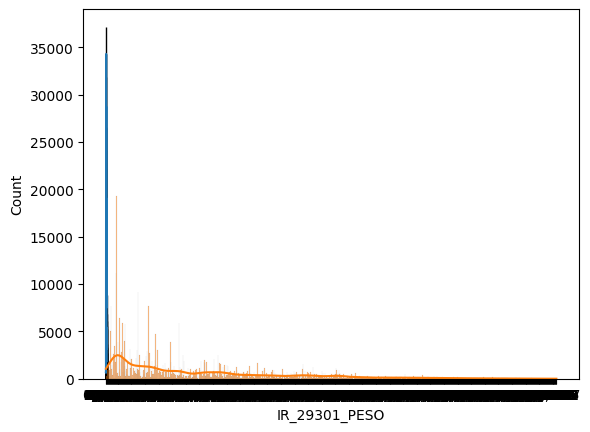

In [180]:
sns.histplot(data['IR_29301_PESO'], bins=30, kde=True)
sns.histplot(dataog['IR_29301_PESO'], bins=30, kde=True)

<Axes: xlabel='IR_29301_PESO', ylabel='Count'>

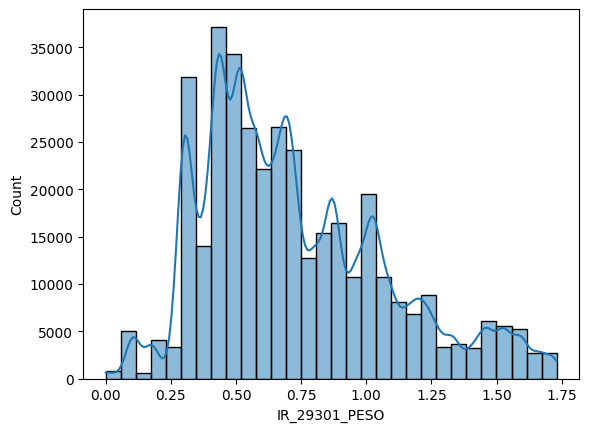

In [181]:
sns.histplot(data['IR_29301_PESO'], bins=30, kde=True)

- **Pregunta secundaria 1:** ¿Existe una relación significativa entre el costo y la edad de los pacientes?
- **Pregunta secundaria 2:** ¿Como distribuyen las personas con multimorbilidad en relación al costo?
- **Pregunta secundaria 3:** ¿Existen regiones cuyos costos sean diferentes en comparación al país?


In [ ]:
bins = [0, 18, 40, 65, 200]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]


data["Rango_Etario"] = pd.cut(data["EDAD"], bins = bins, labels=labels, right=False)

<Axes: xlabel='Rango_Etario', ylabel='Count'>

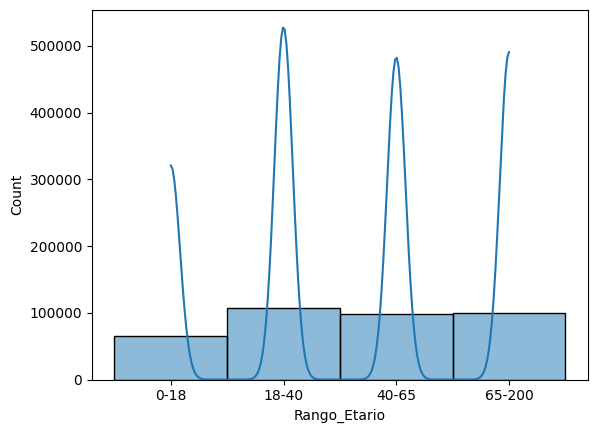

In [187]:
sns.histplot(data['Rango_Etario'], bins=30, kde=True)

In [190]:
#¿Existe una relación significativa entre el costo y la edad de los pacientes?
#H0: No existe relación significativa entre el costo y la edad de los pacientes
#H1: Existe relación significativa entre el costo y la edad de los pacientes
#Se utiliza la prueba de correlación de Pearson para determinar la relación entre las dos variables
correlation, p_value = stats.pearsonr(data['IR_29301_PESO'], data['EDAD'])
print(f"Correlation: {correlation}, P-value: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula, existe una relación significativa entre el costo y la edad de los pacientes")
else:
    print("No se rechaza la hipótesis nula, no existe una relación significativa entre el costo y la edad de los pacientes")


Correlation: 0.2588408835239222, P-value: 0.0
Rechazamos la hipótesis nula, existe una relación significativa entre el costo y la edad de los pacientes


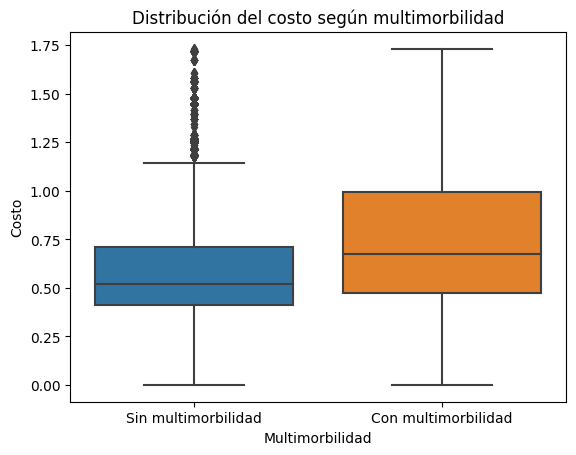

In [ ]:
sns.boxplot(x='Multimorbilidad', y='IR_29301_PESO', data=data)
plt.xticks([0, 1], ['Sin multimorbilidad', 'Con multimorbilidad'])
plt.title('Distribución del costo según multimorbilidad')
plt.ylabel('Costo')
plt.xlabel('Multimorbilidad')
plt.show()

In [203]:
#¿Como distribuyen las personas con multimorbilidad en relación al costo?
#H0: No existe relación significativa entre el costo y la multimorbilidad
#H1: Existe relación significativa entre el costo y la multimorbilidad
#Se utiliza la prueba de correlación de Pearson para determinar la relación entre las dos variables

grupo_sin = data[data['Multimorbilidad'] == 0]['IR_29301_PESO']
grupo_con = data[data['Multimorbilidad'] == 1]['IR_29301_PESO']

t_stat, p_value = stats.ttest_ind(grupo_sin, grupo_con, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula, existe una diferencia significativa en el costo entre personas con y sin multimorbilidad.")
else:
    print("No se rechaza la hipótesis nula, no existe una diferencia significativa en el costo entre personas con y sin multimorbilidad.")


T-statistic: -130.17893521065932, P-value: 0.0
Rechazamos la hipótesis nula, existe una diferencia significativa en el costo entre personas con y sin multimorbilidad.


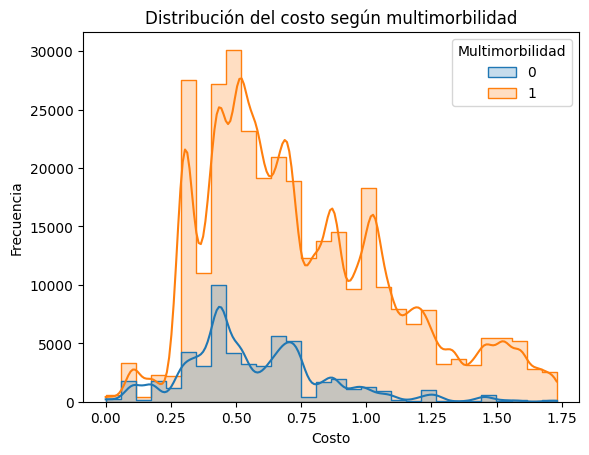

In [ ]:
sns.histplot(data=data, x='IR_29301_PESO', hue='Multimorbilidad', kde=True, bins=30, element='step')
plt.title('Distribución del costo según multimorbilidad')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.show()


In [192]:
#¿Existen regiones cuyos costos sean diferentes en comparación al país?
#H0: No existe relación significativa entre el costo y la región
#H1: Existe relación significativa entre el costo y la región
#Se utiliza la prueba de chi-cuadrado para determinar la relación entre las dos variables
contingency_table = pd.crosstab(data['PROVINCIA'], data['IR_29301_PESO'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, P-value: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula, existe una relación significativa entre el costo y la región")
else:
    print("No se rechaza la hipótesis nula, no existe una relación significativa entre el costo y la región")

Chi2: 177821.7327401797, P-value: 0.0
Rechazamos la hipótesis nula, existe una relación significativa entre el costo y la región
